Last week I visited the National Gallery in Washington, D.C. Among the pieces, there were several Rodin sculptures. While there's nothing remarkable about a gallery having such sculptures, seeing them gave me pause. I've seen Rodin's sculptures in Palo Alto, D.C., London and Paris, and there's never just one or two. Rodin was prolific. He was constantly cranking out sculptures. As I reflected on how many Rodin pieces, I had a thought that many grad students in their late twenties like me have had. What am I doing with my life?

Having seen just how much Rodin did, I want to do more things. I want to produce more "pieces" for others to enjoy, discuss and learn from. In my day job as a graduate research assistant in physics, I produce occasional esoteric articles meant for a very small subset of people. These articles are infrequent, though, and go through multiple layers of revision between my mind and the reader's. This blog is my attempt to do more things -- to produce more for a wider audience.

Beyond this creative motivation, I am also trying to transition my career path toward data science. In my research, I analyze simulations of biopolymers (e.g, proteins and nucleic acids). The data sets from these simulations are often on the order of 100 gigabytes, and from working with these large data sets, I've found that I enjoy the analysis and coding parts of the work more than the physics parts. As I shift my thinking about and skills for dealing with data from a biophysics perspective to more of a data science perspective, I will record the journey here for your enjoyment -- and perhaps for the enjoyment of human resources personnel at companies seeking data scientists....*wink*.

## Feelings by other artists
I claim this blog is about data science, so this post needs some data analysis. Since Rodin made me feel lazy and uncreative, I'm curious what feelings art might be invoking in others. Twitter seems like a great source for human stream of consciousness data, so I'll request a stream of tweets labeled with the keyword "artists" and see what words are associated with such tweets. The python code here is adapted from a tutorial by The Data Incubator. You can watch that tutorial at https://www.youtube.com/watch?v=Zfhc6GQ84e4 and download accompanying code from their repository https://github.com/thedataincubator/ds30. 

In [1]:
# Importing graphics related libraries
%matplotlib inline
import matplotlib
import seaborn as sns  # plots are prettier with Seaborn
import onlineldavb
from wordcloud import WordCloud
from IPython.display import Image
from IPython import display
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

# importing useful libraries
import simplejson  # more efficient than the default json library
import sys
import requests  # better than the urllib libraries
from requests_oauthlib import OAuth1
from collections import Counter
import heapq
from nltk.corpus import stopwords
from sklearn.cluster import MiniBatchKMeans
from itertools import islice, chain
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Uncomment and run these if you've never used nltk before. Download the stopwords corpora
#import nltk
#nltk.download()

### Setup twitter authorization

To use the following code, you need to request Twitter API credentials from http://apps.twitter.com/ and place them into a JSON file called twitter_secrets.json.nogit formatted like this:


In [3]:
{
"api_key": "XXXX",
"api_secret": "XXXX",
"access_token": "XXXX",
"access_token_secret": "XXXX"
}

{'access_token': 'XXXX',
 'access_token_secret': 'XXXX',
 'api_key': 'XXXX',
 'api_secret': 'XXXX'}

### Pull tweets with relevant keyword(s)
Now I'll authenticate with twitter using my API credentials and request tweets associated with the keyword "artists." For more details on ways you can filter the twitter stream, see https://dev.twitter.com/streaming/reference/post/statuses/filter. 

In [4]:
# Read the JSON file
with open("twitter_secrets.json.nogit") as fh:
    secrets = simplejson.loads(fh.read())

# Use the details in the JSON file
auth = OAuth1(
    secrets["api_key"],
    secrets["api_secret"],
    secrets["access_token"],
    secrets["access_token_secret"]
)

# Get the tweets as a python generator
def tweet_generator():
    """ Generator that live streams tweets (see 'yield' keyword)"""
    stream = requests.post('https://stream.twitter.com/1.1/statuses/filter.json',
                         auth=auth,
                         stream=True,
                         data={"track" : ['artist']}) # note my keyword specified here
    
    for line in stream.iter_lines():
        if not line:  # filter out keep-alive new lines
            continue
        tweet = simplejson.loads(line)
        if 'text' in tweet:
            yield tweet['text']

### Raw tweets

Let's look at the first 10 tweets to come in just to make sure it's working.

In [5]:
for tweet in islice(tweet_generator(), 10):
    print(tweet)

RT @DaredevilProd: How To Actually Get PAID Living As An Artist

https://t.co/I0OPrTUmNp

#Marketing
#MusicMarketing https://t.co/sxYzeg1WwB
#USA #Deals #ebay #3835 HomCom 19" LED Artist Stencil Board Tattoo Drawing Tracing Table L… https://t.co/kIPa28RgPS https://t.co/Tzo3H7g8gX
Tessanne Chin - Love Suicide #BarbWiresRadio.Com #Streaming #Artist #Radio
RT @HWarlow: Michael O'Toole is Canadian. He is an experienced artist whose training in architecture serves him very well. https://t.co/CEd…
@Step2UrRight Um this is NOT a personal twitter. All social media of mine (except fb) is my MAKEUP ARTIST PAGES. I don't post personal stuff
@todkapuz check out this artist https://t.co/g0RUnBrGYw
Hip-Hop Halloween: The Best Artist Costumes 2015 https://t.co/ABZ1Ll1GlC
RT @DunkerA_sian: Happy birthday to the amazingly weird, pale, funny nail artist I know @YourBae21
#USA #Deals #ebay #2740 Thornton's Art Supply Premier Soft Core 50 Piece Artist Grade Colo… https://t.co/6KnCrSuE7Q https://t.co/GvGkP

### Exploratory Analysis
I want to know what words are associated with the keyword "artist." However, there will be filler words that I'm not interested in. So, I'll ignore those. Even though the tweets are coming from multiple languages, for this demonstration, I'll only filter out the common English words using the NLTK stopwords collection. After 1,000 tweets, I'll make a bar graph of the top 20 words in tweets with the keyword "artist."

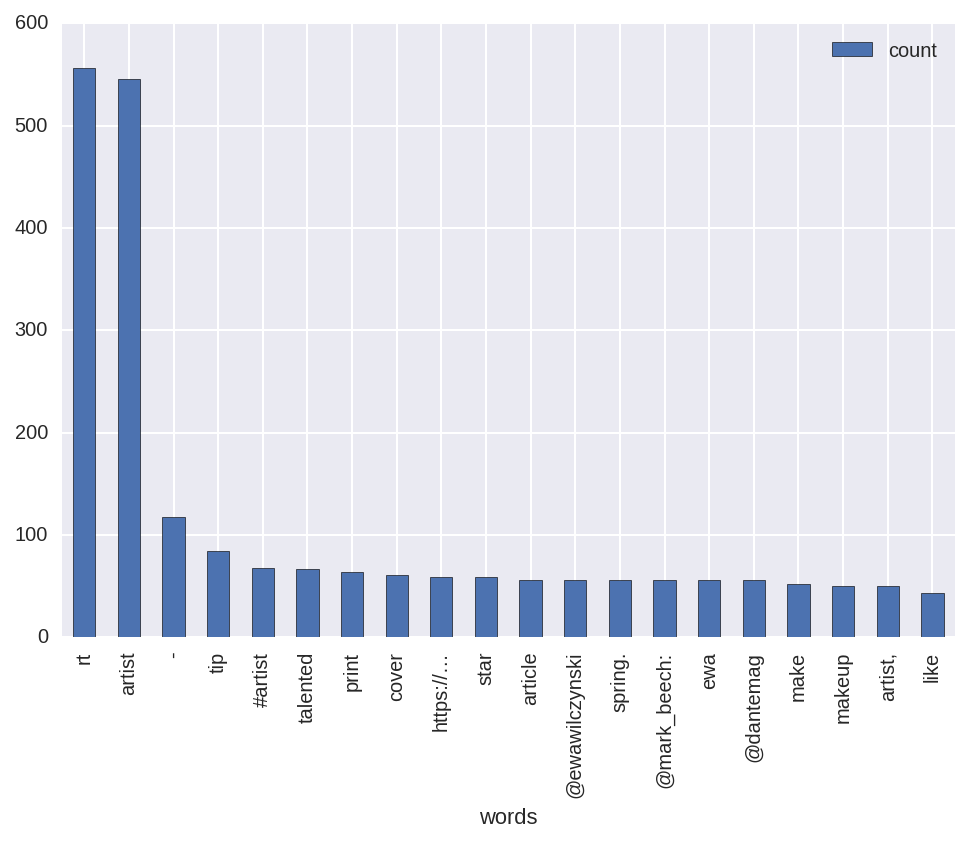

In [6]:
stop = set(stopwords.words('english'))  # predefined list of "uninteresting" words

counter = Counter()

def nlargest(n, word_scores):
    """ Wrapper around heapq to return the n words with the largest count."""
    # word_scores: index 0=>word, 1=>count
    return heapq.nlargest(n, word_scores, key=lambda x: x[1])

try:
    # islice allows you to get some # of values out of a generator.
    for k, tweet in enumerate(islice(tweet_generator(), 1000)):
        for word in tweet.lower().split():  # lowercase, split by whitespace
            if word not in stop:  # avoid uninteresting words
                counter[word] += 1
except KeyboardInterrupt:
    pass  # allow ctrl-c to exit the loop
finally:
    df = pd.DataFrame(nlargest(20, counter.items()), columns=['words', 'count'])
    df.set_index('words').plot(kind='bar')

### Visualization
The bar chart is interesting, but it only has 20 words. Also, there are clearly some issues. The most related word is artist, and some punctuation is being treated as words. For the moment, I'm going to leave it as is, but clearly some cleaning of the data is needed.

I will, however, make the visualization a bit better. Let's make a word cloud, where the relative frequency of the words are shon by their size in the cloud. If you run this code on your own machine, it will update live as data comes in.

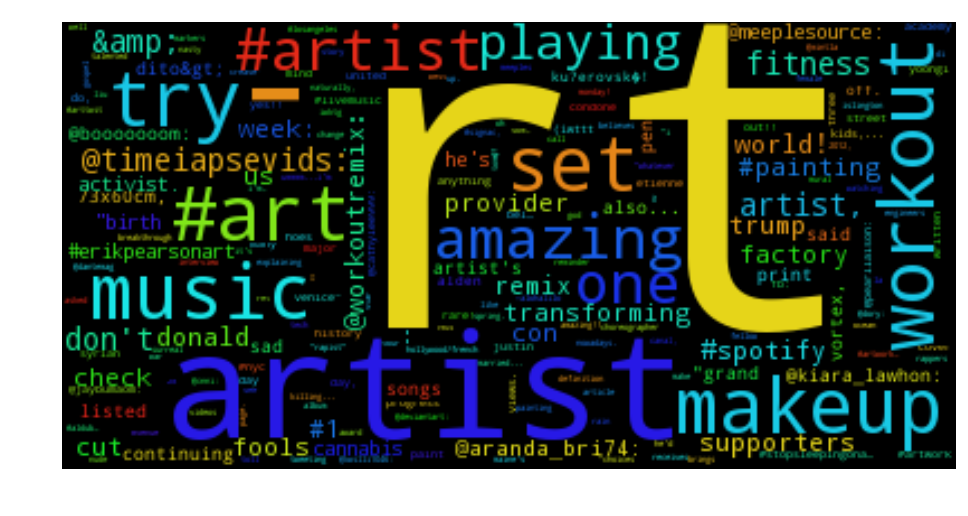

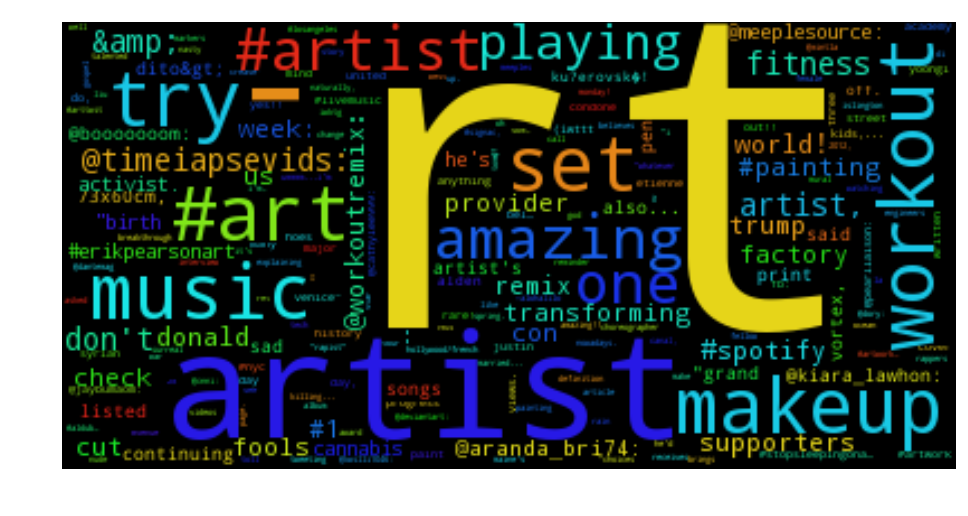

In [8]:
counter = Counter()
DISPLAY_EVERY = 20
try:
    for k, tweet in enumerate(islice(tweet_generator(), 1000)):
        for word in tweet.lower().split():
            if word not in stop and 'http' not in word:
                counter[word] += 1
        if k % DISPLAY_EVERY == (DISPLAY_EVERY - 1):
            wordcloud = WordCloud().fit_words(counter.items())
            plt.axis("off")
            display.clear_output(wait=True)
            plt.imshow(wordcloud)
            display.display(plt.gcf())
except KeyboardInterrupt:
    pass

### Deeper analysis
Are there any topics emerging? We can use a bit of unsupervised learning in the form of K-Means clustering to see if we can parse out any groups of terms. The output word clouds will likewise update live here.

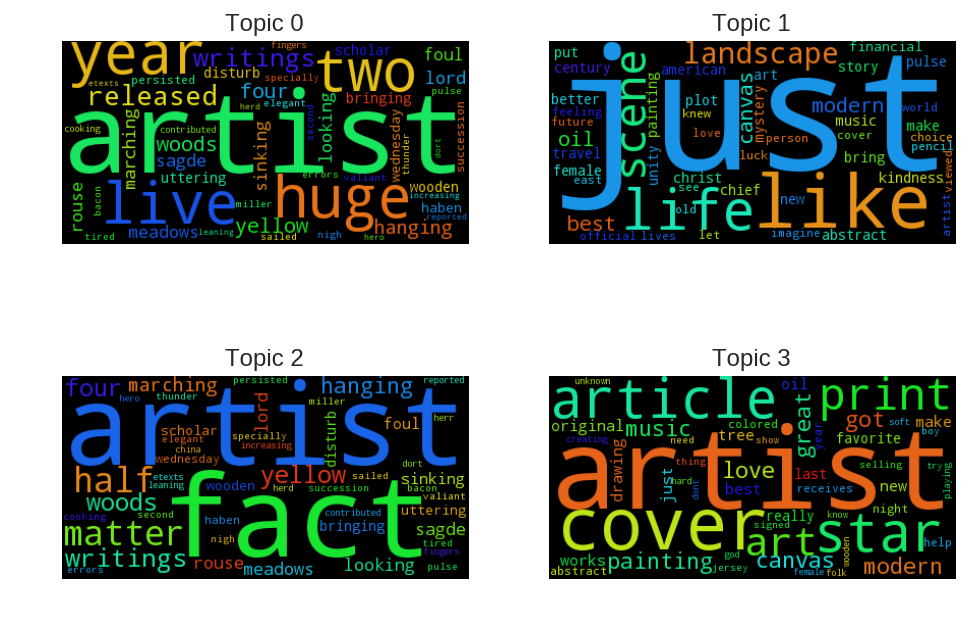

In [9]:
BATCH_SIZE = 20
CLUSTER_SIZE = 4

kmeans = MiniBatchKMeans(n_clusters=CLUSTER_SIZE)

def batch(iterable, size):
    """ batch("ABCDEFG", 3) -> ABC DEF G """
    sourceiter = iter(iterable)
    while True:
        batchiter = islice(sourceiter, size)
        yield chain([next(batchiter)], batchiter)

with open("dictnostops.txt") as fh:
    words = [line.strip() for line in fh.readlines()]
    word_to_index = { word: k for k, word in enumerate(words) }

def wordclouds(wordcounts):
    wordclouds = [WordCloud().fit_words(counts) for counts in wordcounts]
    fig, axes = plt.subplots(2,2)
    display.clear_output(wait=True)
    for k, (ax, wordcloud) in enumerate(zip(axes.flatten(), wordclouds)):
        ax.axis("off")
        ax.imshow(wordcloud)
        ax.set_title("Topic %d" % k)
    display.display(fig)
    fig.clear()

try:
    for tweets in batch(islice(tweet_generator(), 1000), BATCH_SIZE):
        mat = sp.sparse.dok_matrix((BATCH_SIZE, len(words)))
        for row, tweet in enumerate(tweets):
            for word in tweet.lower().split():
                if word in word_to_index:
                    mat[row, word_to_index[word]] = 1.
        kmeans.partial_fit(mat.tocsr())
        wordcounts = [
            nlargest(50, zip(words, kmeans.cluster_centers_[i]))
            for i in range(kmeans.n_clusters)
        ]
        wordclouds(wordcounts)
except KeyboardInterrupt:
    pass